In [ ]:
# Importing libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression,Ridge,Lasso,ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

# ignore the warning messages
import warnings
warnings.filterwarnings('ignore')

#Exploratory Data Analysis (EDA)

**Salary Dataset**
- **YearsExperience:** Employee's years of experience.
- **Salary [Target Column]:** Salary in terms of years of experience.




In [ ]:
# Importing dataset
file_link = 'https://drive.google.com/file/d/1z_7EFfGJ42o0JCklJz0K77NTzPa-QynQ/view?usp=sharing'

# get the id part of the file
id = file_link.split("/")[-2]

# creating a new link using the id for better readability of csv file in pandas
new_link = f'https://drive.google.com/uc?id={id}'
df = pd.read_csv(new_link)


X = df.iloc[:,:-1].values
Y = df.iloc[:,1].values

# Splitting dataset into train and test set

X_train, X_test, y_train, y_test = train_test_split( X, Y, test_size = 1/3, random_state = 2 )


# Linear Regression
reg = LinearRegression()
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print(r2_score(y_test,y_pred))

# Ridge
#alpha = L2 regularization (squared value), alpha  is not 0
reg = Ridge(alpha=0.1)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print(r2_score(y_test,y_pred))

# Lasso
#alpha = L1 regularization (absolute value)
reg = Lasso(alpha=0.01)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print(r2_score(y_test,y_pred))

# ElasticNet
#alpha = mult, l1_ratio = sum or combination
reg = ElasticNet(alpha=0.01,l1_ratio=0.9)
reg.fit(X_train,y_train)
y_pred = reg.predict(X_test)
print(r2_score(y_test,y_pred))



0.9041801644162628
0.9042534117787511
0.9041801799163933
0.904194904373961


Predicted values  [42550.03 40867.86 69464.67]
Real values       [46205. 39343. 61111.]
Trained W         8410.83
Trained b         31615.96


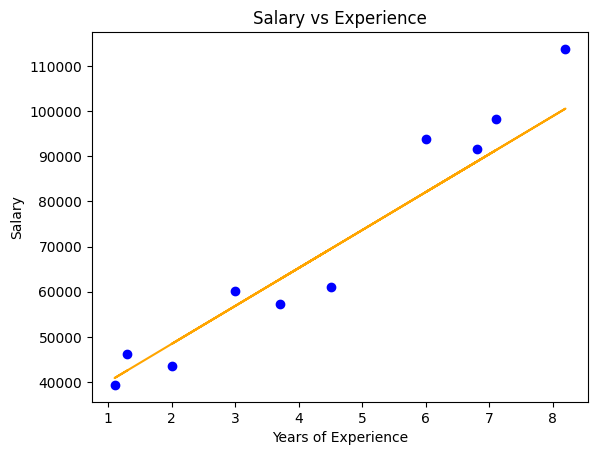

In [ ]:
# Elastic Net Regression
class ElasticRegression():
    def __init__(self,learning_rate,iterations,l1_penality,l2_penality ) :
        self.learning_rate = learning_rate
        self.iterations = iterations
        self.l1_penality = l1_penality
        self.l2_penality = l2_penality


    # Function for model training
    def fit(self,X,Y) :
        # no_of_training_examples, no_of_features
        self.m, self.n = X.shape
        # weight initialization
        self.W = np.zeros( self.n )
        self.b = 0
        self.X = X
        self.Y = Y

# _______________
        self.b = np.mean(self.Y)


        for i in range(self.iterations):
          self.update_weights()

    # Helper function to update weights in gradient=
    def update_weights( self ):
        Y_pred = self.predict( self.X )
        # calculate gradients
        rsdls= Y_pred - self.Y
        dW = np.zeros( self.n )
        db= np.mean(rsdls)
        # write necessary loop and conditions to calculate gradients
        dW = np.dot(self.X.T, rsdls)/self.n
        self.W -= self.learning_rate*(dW + self.l1_penality*np.sign(self.W) + self.l2_penality*self.W/self.m)
        self.b -= self.learning_rate * db

        return


    # Hypothetical function  h( x )

    def predict( self,X ) :
        return X.dot( self.W)+self.b

# Model training
model = ElasticRegression( iterations = 10000,  learning_rate = 0.001, l1_penality = 1, l2_penality = 1 )
model.fit( X_train, y_train )
# Prediction on test set
Y_pred = model.predict( X_test )

print( "Predicted values ", np.round( Y_pred[:3], 2 ) )

print( "Real values      ", y_test[:3] )

print( "Trained W        ", round( model.W[0], 2 ) )

print( "Trained b        ", round( model.b, 2 ) )

# Visualization on test set

plt.scatter( X_test, y_test, color = 'blue' )

plt.plot( X_test, Y_pred, color = 'orange' )

plt.title( 'Salary vs Experience' )

plt.xlabel( 'Years of Experience' )

plt.ylabel( 'Salary' )

plt.show()